- **Traditional Approach:**
  - Explicit manual coding of matrix operations and gradients.
  - Uses memory-intensive one-hot encoding.
  - Manual implementation of optimization processes.

- **PyTorch Model:**
  - Automates derivatives computation with `autograd`.
  - Efficient word embedding handling with `nn.Embedding`.
  - Supports GPU acceleration for improved computation speed.
  - Provides built-in loss functions and optimizers in `nn` and `optim` packages.

- **Behind the Scenes in PyTorch:**
  - Builds computation graph for automatic gradient calculation.
  - Dynamic graph enables efficient computation and runtime flexibility.
  - Modular design enhances customization and extension.

- **Core PyTorch Classes:**
  - `torch.Tensor`: Fundamental data structure for operations.
  - `nn.Module`: Base class for neural network components.
  - `nn.Parameter`: Special tensor for model parameters.
  - `nn.Embedding`: Lookup table for dense vector embeddings.
  - `optim`: Contains optimization algorithms like SGD, Adam.
  - `autograd`: Facilitates automatic differentiation process.

In [2]:
#%%
import torch
import torch.nn as nn
import torch.optim as optim

# Define the corpus and preprocessing
corpus = [ "The king ruled the kingdom with wisdom.", "The queen ruled the kingdom with grace.", "A wise man gave counsel to the king.", "A wise woman gave counsel to the queen.", "The king and the queen hosted a grand ball.", "The man went to the market.", "The woman went to the garden.", "The king and the man discussed politics.", "The queen and the woman discussed art.", "The king and the woman went for a walk.", "The man and the queen had a conversation.", "The wise king made important decisions.", "The wise woman offered valuable advice.", "The king and the man played chess.", "The queen and the woman painted together." ]

tokens = [sentence.split() for sentence in corpus]
vocabulary = set(word for sentence in tokens for word in sentence)
word_to_index = {word: i for i, word in enumerate(vocabulary)}

# Define the model
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_size):
        super(Word2Vec, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_size)
        self.out_layer = nn.Linear(embedding_size, vocab_size)
    
    def forward(self, input_word_indices):
        embedded = self.embeddings(input_word_indices)
        scores = self.out_layer(embedded)
        return scores

# Parameters
vocab_size = len(vocabulary)
embedding_size = 5
window_size = 2

# Model, Loss, and Optimizer
model = Word2Vec(vocab_size, embedding_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate training pairs
training_pairs = []
for sentence in tokens:
    sentence_indices = [word_to_index[word] for word in sentence]
    for i in range(len(sentence_indices)):
        for j in range(max(i - window_size, 0), min(i + window_size + 1, len(sentence_indices))):
            if i != j:
                training_pairs.append((sentence_indices[i], sentence_indices[j]))

# Training loop
losses =[]
epochs = 1000
for epoch in range(epochs):
    total_loss = 0
    for center_word, context_word in training_pairs:
        center_word_tensor = torch.tensor([center_word], dtype=torch.long)
        context_word_tensor = torch.tensor([context_word], dtype=torch.long)
        
        optimizer.zero_grad()
        log_probs = model(center_word_tensor)
        loss = criterion(log_probs, context_word_tensor)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        # append total loss
    losses.append(total_loss)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss}')
# plot loss
#%%
#%%
import matplotlib.pyplot as plt

# Assume model is the trained Word2Vec model from the PyTorch implementation
word_list = ['king', 'man', 'woman', 'queen']

# Getting embeddings from the PyTorch model
embeddings = [model.embeddings(torch.tensor(word_to_index[word])).detach().numpy() for word in word_list]
vec_king, vec_man, vec_woman, vec_queen = embeddings

# Compute "king - man + woman" using PyTorch tensors
vec_result = vec_king - vec_man + vec_woman
#%%

# %%


Epoch 0, Loss: 1335.9761414527893
Epoch 100, Loss: 847.5676792263985
Epoch 200, Loss: 758.905623793602
Epoch 300, Loss: 727.5628929138184
Epoch 400, Loss: 714.354466676712
Epoch 500, Loss: 707.6457102894783
Epoch 600, Loss: 703.4580167531967
Epoch 700, Loss: 700.4192261099815
Epoch 800, Loss: 698.4239500761032
Epoch 900, Loss: 697.0454946756363


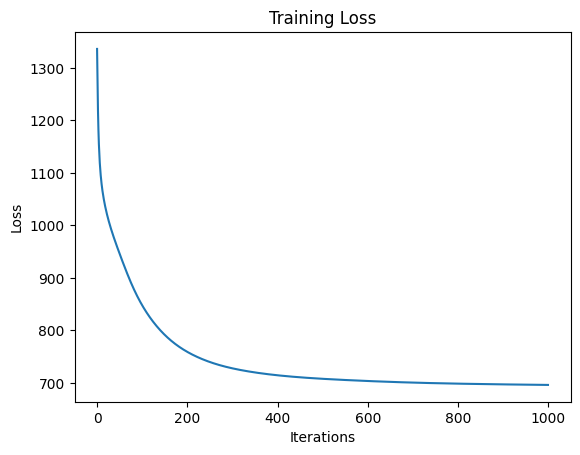

In [3]:

import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

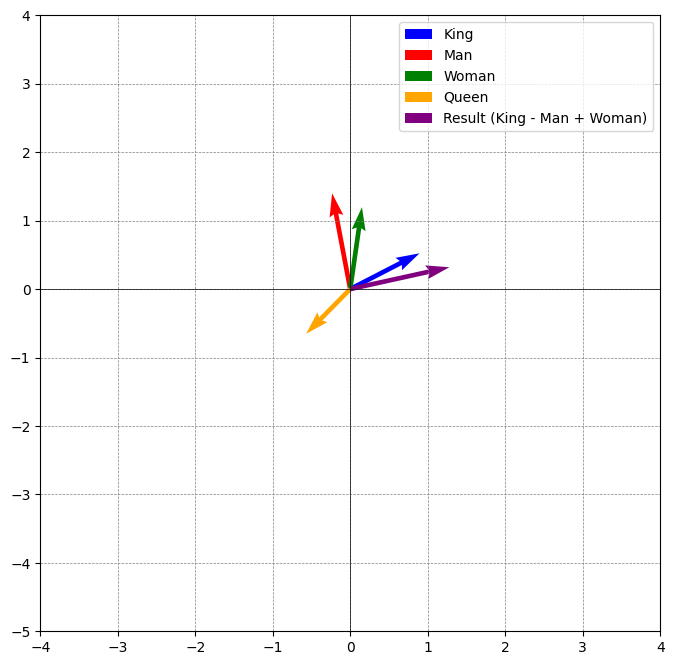

In [4]:

# Plotting
plt.figure(figsize=(8, 8))
plt.quiver(0, 0, vec_king[0], vec_king[1], angles='xy', scale_units='xy', scale=1, color='blue', label='King')
plt.quiver(0, 0, vec_man[0], vec_man[1], angles='xy', scale_units='xy', scale=1, color='red', label='Man')
plt.quiver(0, 0, vec_woman[0], vec_woman[1], angles='xy', scale_units='xy', scale=1, color='green', label='Woman')
plt.quiver(0, 0, vec_queen[0], vec_queen[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Queen')
plt.quiver(0, 0, vec_result[0], vec_result[1], angles='xy', scale_units='xy', scale=1, color='purple', label='Result (King - Man + Woman)')
plt.xlim(-4, 4)
plt.ylim(-5, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()